# Detection of Cardiovascular Disease Using Machine Learning classification models
### Hana ALalawi & Manal Alsuwat

## Import Libraries 

In [1]:
# Apply neural network with keras 
from numpy import loadtxt
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
#optimazation
from keras.optimizers import Adam, SGD

#evaluation metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

#dataset splitting
from sklearn.model_selection import train_test_split

#dataset
import numpy as np
import pandas as pd
import matplotlib
from  matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Pretty display for notebooks
%matplotlib inline

In [2]:
#read in the dataset
dataset = pd.read_csv('../input/cardio-data-dv13032020/cardiovascular_diseases_dv3.csv', sep=';')

# split into input (X) and output (y) variables
X = dataset.drop(['CARDIO_DISEASE'], axis=1, inplace=False)
y = dataset['CARDIO_DISEASE']

# EDA

In [3]:
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [4]:
dataset.tail(5)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1
68782,56,1,170,72,120,80,2,1,0,0,1,0


In [5]:
dataset.columns

Index(['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL',
       'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE'],
      dtype='object')

In [6]:
dataset.shape

(68783, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


## Age

In [8]:
# Convert the ages from number of days to categorical values
def calculate_age(days):
    days_year = 365.2425
    age = int(days // days_year)
    return age

In [9]:
# According to US National Library of Medicine National Institutes of Health the age groups are classified
def categorize_age(age):
    if 0 < age <= 2:
        return "Infants"
    elif 2 < age <= 5:
        return "Pre School Child"
    elif 5 < age <= 12:
        return "Child"
    elif 12 < age <= 19:
        return "Adolescent"
    elif 19 < age <= 24:
        return "Young Adult"
    elif 24 < age <= 44:
        return "Adult"
    elif 44 < age <= 65:
        return "Middle Aged"
    elif 65 < age:
        return "Aged"

In [10]:
def categorize_age_tees(age):
    if 0 < age <= 10:
        return "10s"
    elif 10 < age <= 30:
        return "20s"
    elif 20 < age <= 30:
        return "30s"
    elif 30 < age <= 40:
        return "40s"
    elif 40 < age <= 50:
        return "50s"
    elif 50 < age <= 60:
        return "60s"
    elif 60 < age <= 70:
        return "70+"

In [11]:
# age transformations
#dataset['AGE'] = dataset['AGE'].apply(lambda x: calculate_age(x))
dataset['age_cat'] = dataset['AGE'].apply(lambda x: categorize_age(x))
dataset['age_tees'] = dataset['AGE'].apply(lambda x: categorize_age_tees(x))
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,age_cat,age_tees
0,50,2,168,62,110,80,1,1,0,0,1,0,Middle Aged,50s
1,55,1,156,85,140,90,3,1,0,0,1,1,Middle Aged,60s
2,52,1,165,64,130,70,3,1,0,0,0,1,Middle Aged,60s
3,48,2,169,82,150,100,1,1,0,0,1,1,Middle Aged,50s
4,48,1,156,56,100,60,1,1,0,0,0,0,Middle Aged,50s


In [12]:
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,age_cat,age_tees
0,50,2,168,62,110,80,1,1,0,0,1,0,Middle Aged,50s
1,55,1,156,85,140,90,3,1,0,0,1,1,Middle Aged,60s
2,52,1,165,64,130,70,3,1,0,0,0,1,Middle Aged,60s
3,48,2,169,82,150,100,1,1,0,0,1,1,Middle Aged,50s
4,48,1,156,56,100,60,1,1,0,0,0,0,Middle Aged,50s


<AxesSubplot:xlabel='age_cat', ylabel='count'>

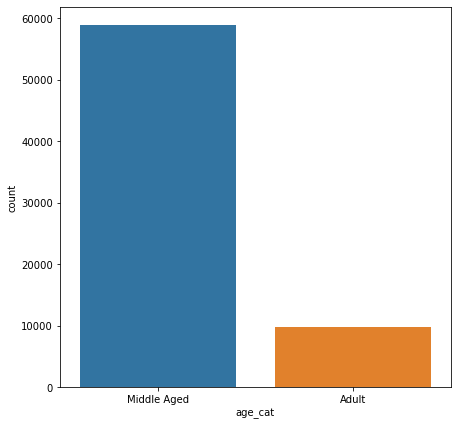

In [13]:
# Visulization the age categories
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', data = dataset) 
#the most caused pateints are from middle age 

<AxesSubplot:xlabel='age_cat', ylabel='count'>

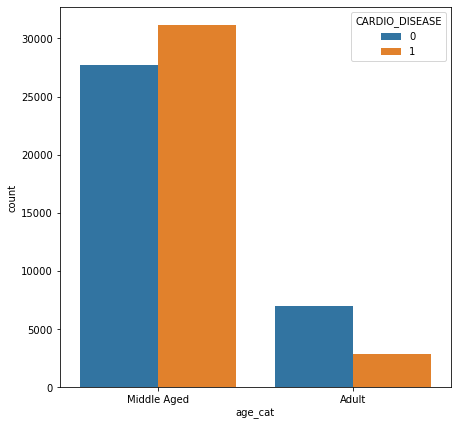

In [14]:
#the relation between the age group and the getting affecting by CVD
# Visulization of age groups with cvdd info
rcParams['figure.figsize'] = 7, 7
sns.countplot(x ='age_cat', hue = 'CARDIO_DISEASE', data = dataset) 
#The graph says mostly middle aged people are affected by CVD comparing to Adult

<AxesSubplot:xlabel='age_tees', ylabel='count'>

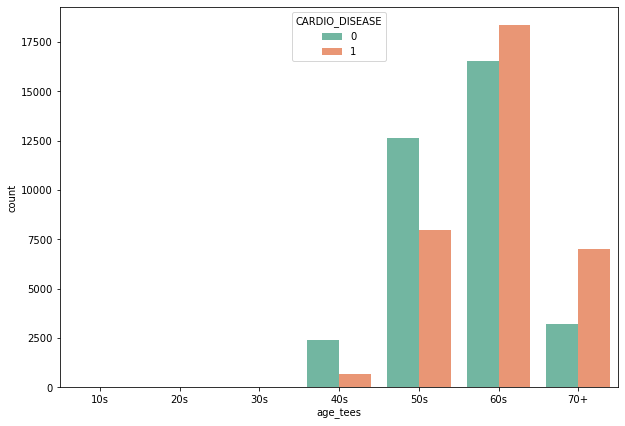

In [15]:
rcParams['figure.figsize'] = 10, 7
sns.countplot(x='age_tees', hue='CARDIO_DISEASE', data = dataset, palette="Set2", order = ['10s','20s','30s','40s','50s','60s','70+'])
#From this visual we can assume that people who are 40 greater in age are more exposed to CVD
#this graph infer that 60s and 70+ ages are more prone to CVD compare to 40s and 50s.
#Also there are no CVD patient in 10s, 20s, 30s category.which will be taken in the feature engineering modeling

## Gender

In [16]:
#Coming into gender ratio , 
# Gender Ratio
dataset['GENDER'].value_counts()
#Label 2 has more count of Alcohol consumption compare to Label 1 which adds more strenght of Label 2 being Male.
#This count values says that Label 1 ( Female ) are more compare to Label 2 ( Male )

1    44795
2    23988
Name: GENDER, dtype: int64

In [17]:
# Calcualte the CVD distribution based on Gender
dataset['CARDIO_DISEASE'].value_counts(normalize=True)
#Almost two gender are equally distributed which is balanced based on ratio.

0    0.505096
1    0.494904
Name: CARDIO_DISEASE, dtype: float64

<AxesSubplot:xlabel='GENDER', ylabel='count'>

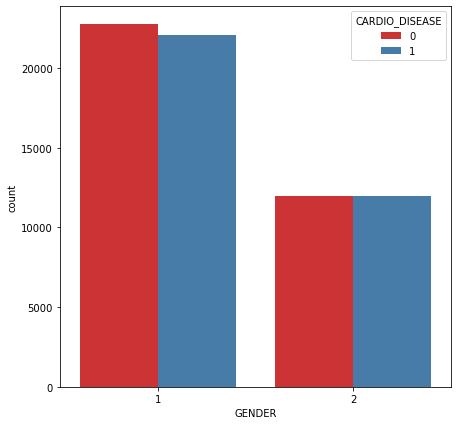

In [18]:
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='GENDER', hue='CARDIO_DISEASE', data = dataset, palette="Set1")
#Visualizations shows the the disease label is equally distributed but the gender population is not balanced . 
#Label 1 ( Female ) is twice the count of Label 2 ( Male )

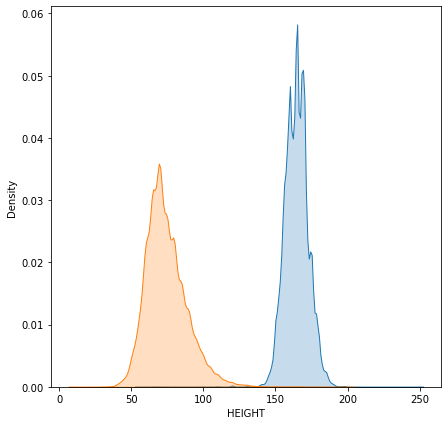

In [19]:
#Analysing height and weight of the patients to caluclate the BMI and check their health condition.
#Initially the analysis of the height & weight distribution based on gender
#BMI - Body Mass Index

for col in ["HEIGHT", "WEIGHT"]:
    sns.kdeplot(dataset[col], shade=True)


## BMI (Obise or not)

<AxesSubplot:ylabel='BMI_State'>

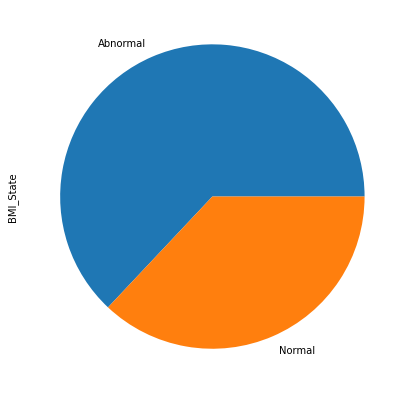

In [20]:
#the BMI says whether the person is in Normal health or not . To calcualte it we have a formula
#BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
#Normal BMI values are said to be from 18.5 to 25. Over 25 is not healthy Obise, Under 18 is not healthy too

dataset['BMI'] = dataset['WEIGHT']/((dataset['HEIGHT']/100)**2)

# categorize normal & abnormal
def bmi_categorize(bmi_score):
    if 18.5 <= bmi_score <= 25:
        return "Normal"
    else:
        return "Abnormal"

dataset["BMI_State"] = dataset["BMI"].apply(lambda x: bmi_categorize(x))
dataset["BMI_State"].value_counts().plot(kind='pie')


#The majority of the patients in the dataset are abnormal .

<AxesSubplot:xlabel='BMI_State', ylabel='count'>

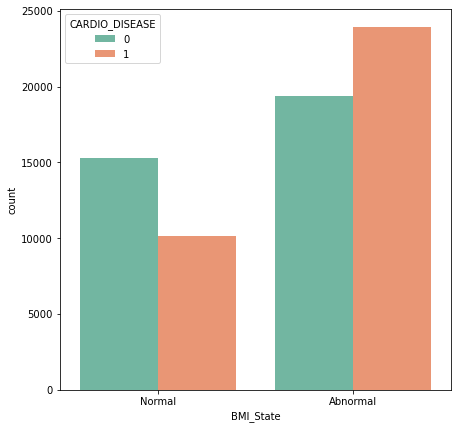

In [21]:
#the relation between the abnormal BMI and having CVD 
rcParams['figure.figsize'] = 7, 7
sns.countplot(x='BMI_State', hue='CARDIO_DISEASE', data = dataset, palette="Set2")
#This plot gave a valuable insight stating that people who follows normal BMI score are less prone to CVD and people with abnormal BMI 
#are having increasing CVD.

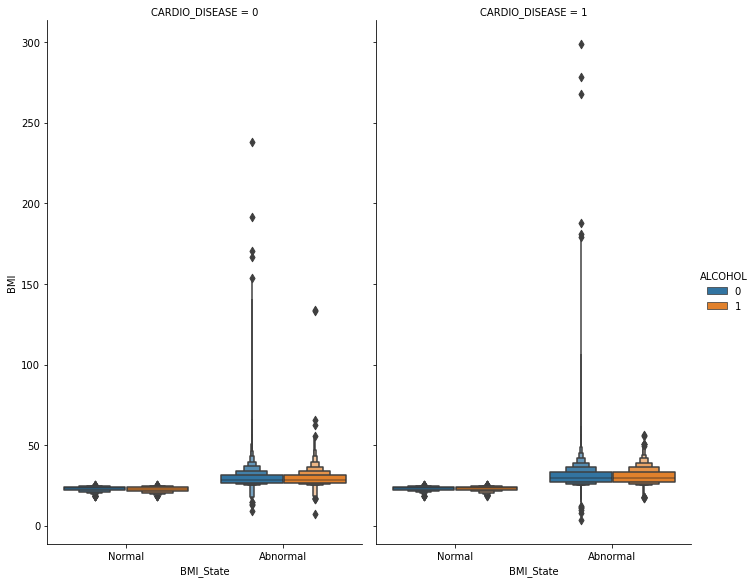

In [22]:
#Check the other habits that may effect the BMI such as alcohol habit, physical activities, smoking etc. 
# comparison plot with alcohol consumption with CVD patients
sns.catplot(x="BMI_State", y="BMI" , hue="ALCOHOL", col="CARDIO_DISEASE", data=dataset, kind="boxen", height=8, aspect=.6)
#based on the plot below, ALCOHOL has a slight effect on the patients BMI, but according to FDA ALCOHOL, Obesity (High MBI), High blood pressure, Lack of physical activity
#Poorly controlled blood sugars, and Smoking are the causes of the CVD

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


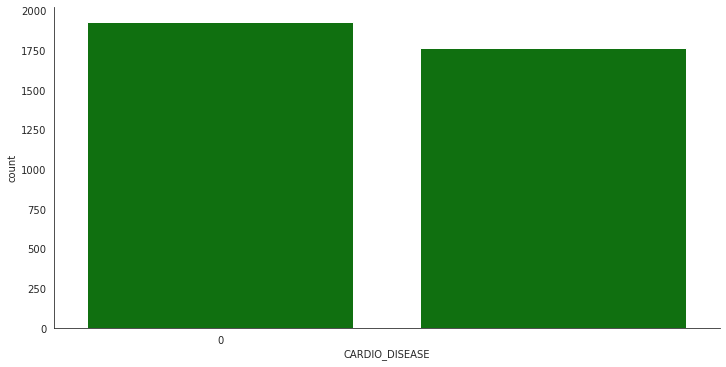

In [23]:
# segregate data based on patients having Cvdd "1"
#the relation between having CVD and the alcohol
df_cardio_alco = dataset.loc[dataset["ALCOHOL"] == 1]
with sns.axes_style('white'):
    g = sns.factorplot("CARDIO_DISEASE", data=df_cardio_alco, aspect=2,kind="count", color='green')
    g.set_xticklabels(step=5)
    
    
#By plots and dataset given , alcohol consumption does not seem to be contributing feature to cardio disease classification. 
#If alcohol consumption seems to be factor it should have high cardio disease count, alcohol feature will be deleted 

## Smoking and phyisical activity

<AxesSubplot:ylabel='SMOKE'>

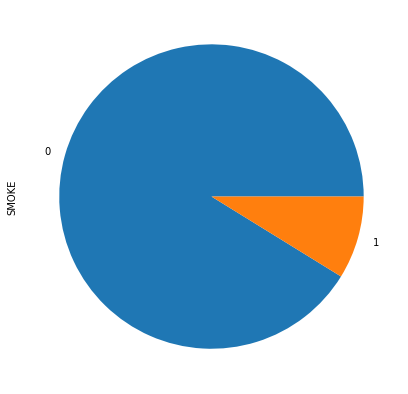

In [24]:
dataset["SMOKE"].value_counts().plot(kind='pie')
#in general most of the patients are not smokers 
# Does the smokers are prone to cardio disease, NO there is no relation 

<AxesSubplot:ylabel='PHYSICAL_ACTIVITY'>

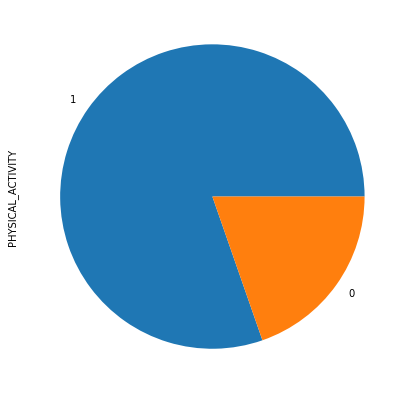

In [25]:
dataset["PHYSICAL_ACTIVITY"].value_counts().plot(kind='pie')
#Most of the patients are physically active in the dataset

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


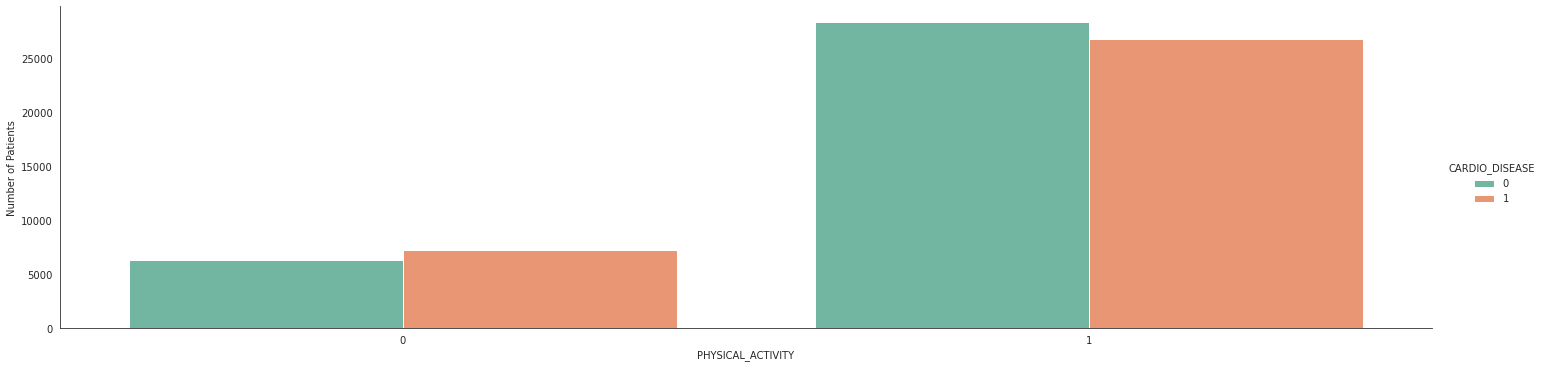

In [26]:
#the patients who are not physically active suffreing from CVD
with sns.axes_style('white'):
    g = sns.factorplot("PHYSICAL_ACTIVITY", data=dataset, aspect=4.0, kind='count',
                       hue='CARDIO_DISEASE', palette="Set2")
    g.set_ylabels('Number of Patients')
#0 non active - 1 is active 

## The BP (The blood pressure)

<AxesSubplot:ylabel='AP_HIGH'>

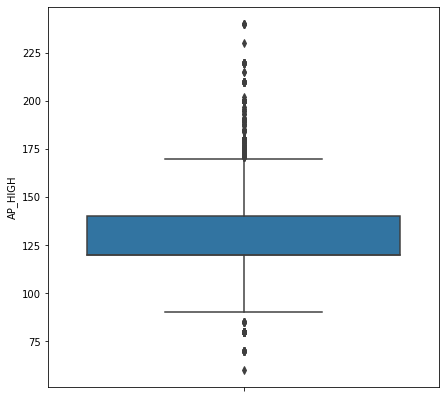

In [27]:
#Remove the outliers from the AP_HIGH, and then classify the patients againe based on blood pressure category level.
sns.boxplot( y=dataset["AP_HIGH"] )
#remove values less than 80 and over 200


<AxesSubplot:ylabel='AP_LOW'>

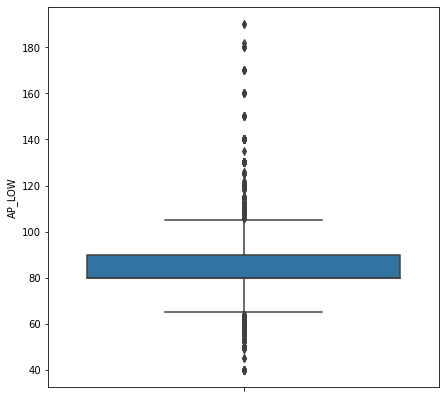

In [28]:
#Remove the outliers from the AP_LOW
sns.boxplot( y=dataset["AP_LOW"] )
#the is no outliers

In [29]:
## Classify the patients based on their blood pressure
def categorize_blood_pressure(x):
    if x['AP_HIGH'] < 120 and x['AP_LOW'] < 80:
        return "Normal"
    elif 120 <= x['AP_HIGH'] <= 129 and x['AP_LOW'] < 80:
        return "Elevated"
    elif 130 <= x['AP_HIGH'] <= 139 or 80 <= x['AP_LOW'] <= 89:
        return "High Blood Pressure(Stage 1)"
    elif  140 <= x['AP_HIGH'] <= 180 or 90 <= x['AP_LOW'] <= 120:
        return "High Blood Pressure(Stage 2)"
    elif  (x['AP_HIGH'] > 180 and  x['AP_LOW'] > 120) or (x['AP_HIGH'] > 180 or x['AP_LOW'] > 120):
        return "Hypertensive Crisis"

In [30]:
# remove outliers
#out_lier = ((dataset["AP_HIGH"]>250) | (dataset["AP_HIGH"]>250) | (dataset["AP_LOW"]>200) )
#dataset = dataset[~out_lier]
# categorizing blood pressure
dataset['blood_pressure'] = dataset.apply(categorize_blood_pressure, axis=1)
 
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,age_cat,age_tees,BMI,BMI_State,blood_pressure
0,50,2,168,62,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,Normal,High Blood Pressure(Stage 1)
1,55,1,156,85,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,Abnormal,High Blood Pressure(Stage 2)
2,52,1,165,64,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,Normal,High Blood Pressure(Stage 1)
3,48,2,169,82,150,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,Abnormal,High Blood Pressure(Stage 2)
4,48,1,156,56,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,Normal,Normal


<AxesSubplot:ylabel='blood_pressure'>

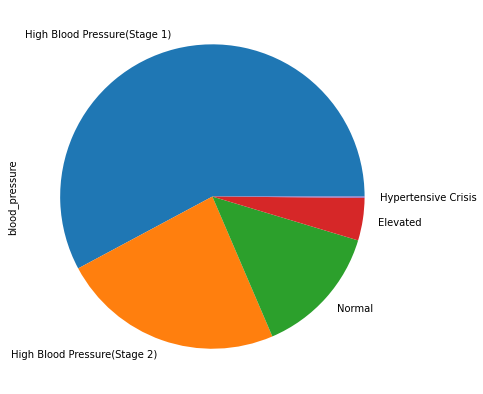

In [31]:
 #Visulization of blood pressure types
dataset["blood_pressure"].value_counts().plot(kind='pie')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


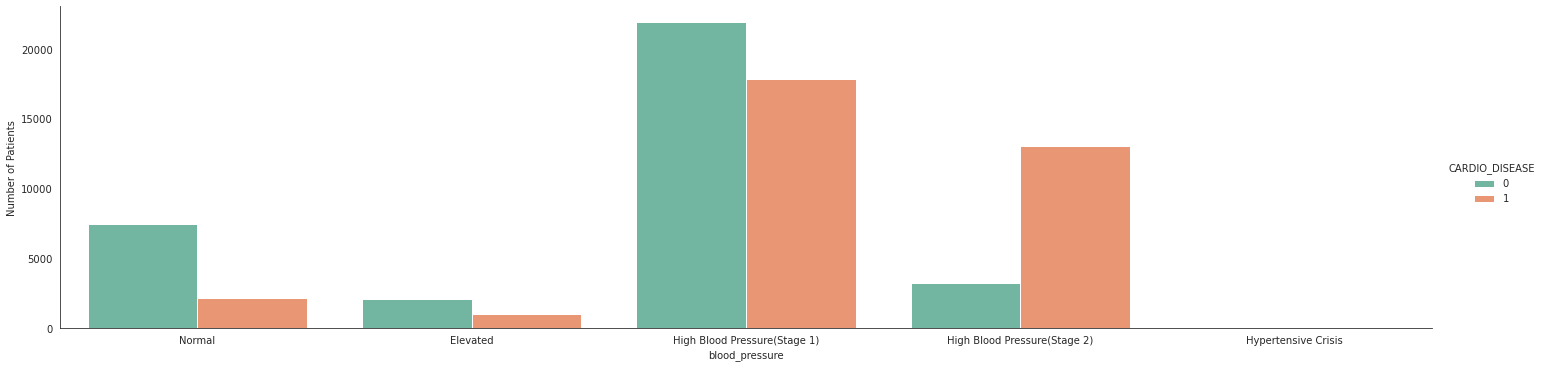

In [32]:
#Most of them are in elevated condition followed by stage 2 and normal.

#the most type suffering from cardio disease is stage 2 they are prone to cardio disease
with sns.axes_style('white'):
    g = sns.factorplot("blood_pressure", data=dataset, aspect=4.0, kind='count',
                       hue='CARDIO_DISEASE', palette="Set2", order=["Normal", "Elevated", "High Blood Pressure(Stage 1)", "High Blood Pressure(Stage 2)", "Hypertensive Crisis"])
    g.set_ylabels('Number of Patients')


## Cholestrol feature

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


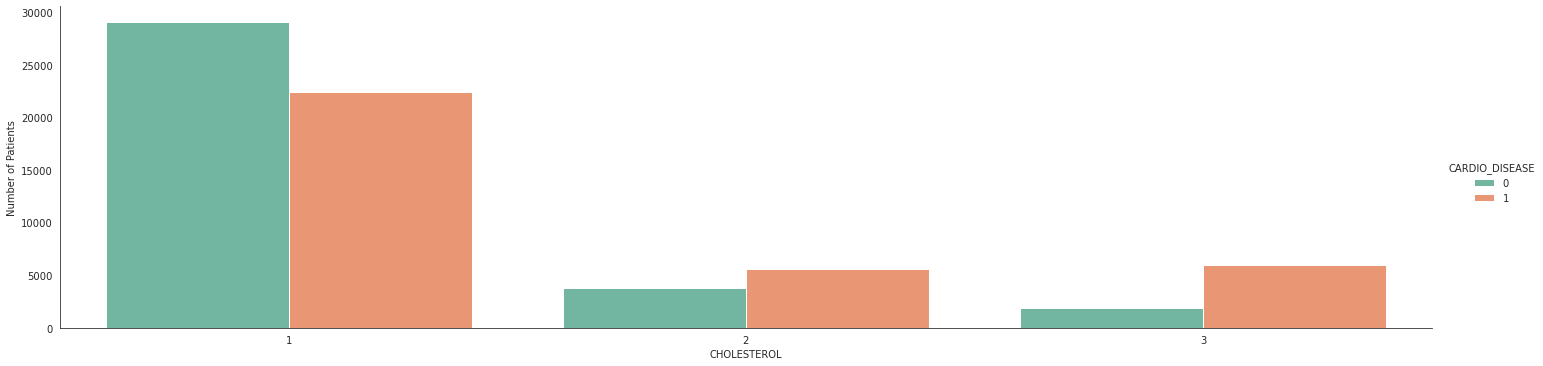

In [33]:
with sns.axes_style('white'):
    g = sns.factorplot("CHOLESTEROL", data=dataset, aspect=4.0, kind='count',
                       hue='CARDIO_DISEASE', palette="Set2")
    g.set_ylabels('Number of Patients')
#he patients who are having above normal & well above normal are the highest risk patient for CVD compare to the normal level cholestrol patients.

# glucose realtion with CVD (sugar)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


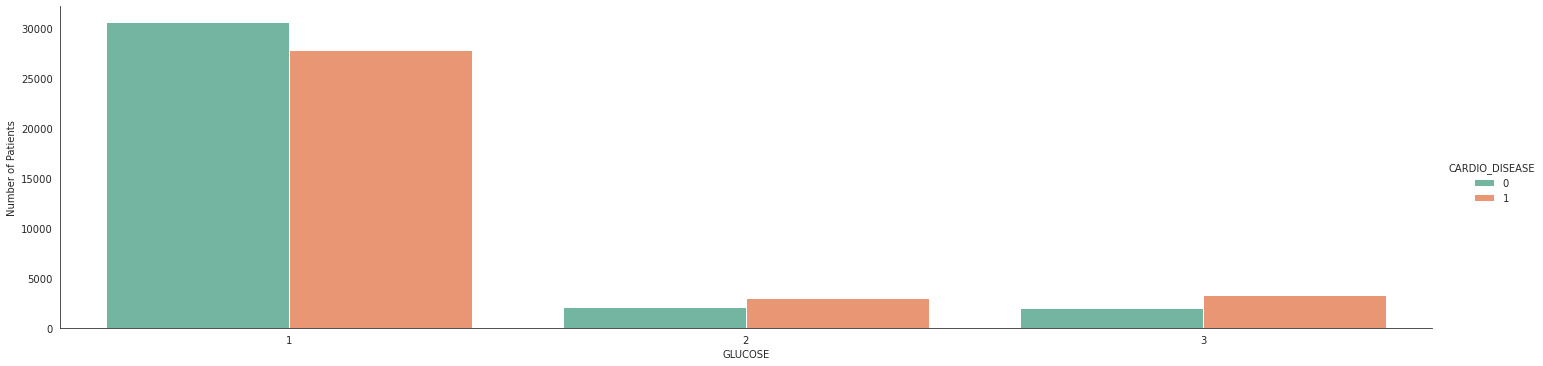

In [34]:
with sns.axes_style('white'):
    g = sns.factorplot("GLUCOSE", data=dataset, aspect=4.0, kind='count',
                       hue='CARDIO_DISEASE', palette="Set2")
    g.set_ylabels('Number of Patients')
#this shows most are maintaining normal glucose level and abnormal patients have high risk to CVD.

In [35]:
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,age_cat,age_tees,BMI,BMI_State,blood_pressure
0,50,2,168,62,110,80,1,1,0,0,1,0,Middle Aged,50s,21.967120,Normal,High Blood Pressure(Stage 1)
1,55,1,156,85,140,90,3,1,0,0,1,1,Middle Aged,60s,34.927679,Abnormal,High Blood Pressure(Stage 2)
2,52,1,165,64,130,70,3,1,0,0,0,1,Middle Aged,60s,23.507805,Normal,High Blood Pressure(Stage 1)
3,48,2,169,82,150,100,1,1,0,0,1,1,Middle Aged,50s,28.710479,Abnormal,High Blood Pressure(Stage 2)
4,48,1,156,56,100,60,1,1,0,0,0,0,Middle Aged,50s,23.011177,Normal,Normal


In [36]:
#Finally the correlation graph with the engineered features and selected ones
# Filtering out the required features

new_dataset_version = dataset[["GENDER","age_tees","BMI","BMI_State","CHOLESTEROL","PHYSICAL_ACTIVITY","CARDIO_DISEASE","blood_pressure"]].copy()
new_dataset_version.head()

,GENDER,age_tees,BMI,BMI_State,CHOLESTEROL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,blood_pressure
0,2,50s,21.967120,Normal,1,1,0,High Blood Pressure(Stage 1)
1,1,60s,34.927679,Abnormal,3,1,1,High Blood Pressure(Stage 2)
2,1,60s,23.507805,Normal,3,0,1,High Blood Pressure(Stage 1)
3,2,50s,28.710479,Abnormal,1,1,1,High Blood Pressure(Stage 2)
4,1,50s,23.011177,Normal,1,0,0,Normal


In [37]:
#LABEL ENCODING 
# Label encode the categorical columns BMI_State & blood category
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(new_dataset_version['BMI_State'])
new_dataset_version['BMI_State'] = le.transform(new_dataset_version['BMI_State'])

# blood category
le.fit(new_dataset_version['blood_pressure'])
new_dataset_version['blood_pressure'] = le.transform(new_dataset_version['blood_pressure'])

# age tees
le.fit(new_dataset_version['age_tees'])
new_dataset_version['age_tees'] = le.transform(new_dataset_version['age_tees'])

new_dataset_version.head()

,GENDER,age_tees,BMI,BMI_State,CHOLESTEROL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,blood_pressure
0,2,2,21.967120,1,1,1,0,1
1,1,3,34.927679,0,3,1,1,2
2,1,3,23.507805,1,3,0,1,1
3,2,2,28.710479,0,1,1,1,2
4,1,2,23.011177,1,1,0,0,4


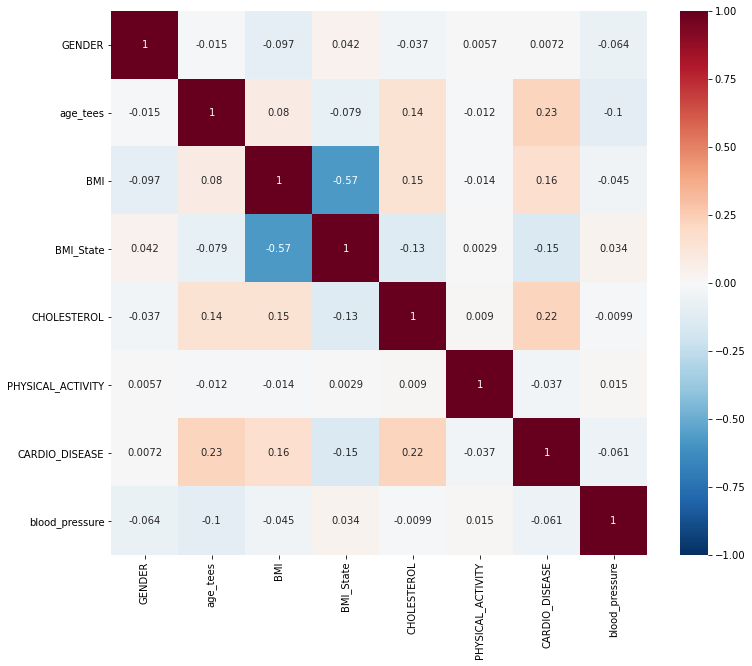

In [38]:
# plotting correlation map

correlation = new_dataset_version.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

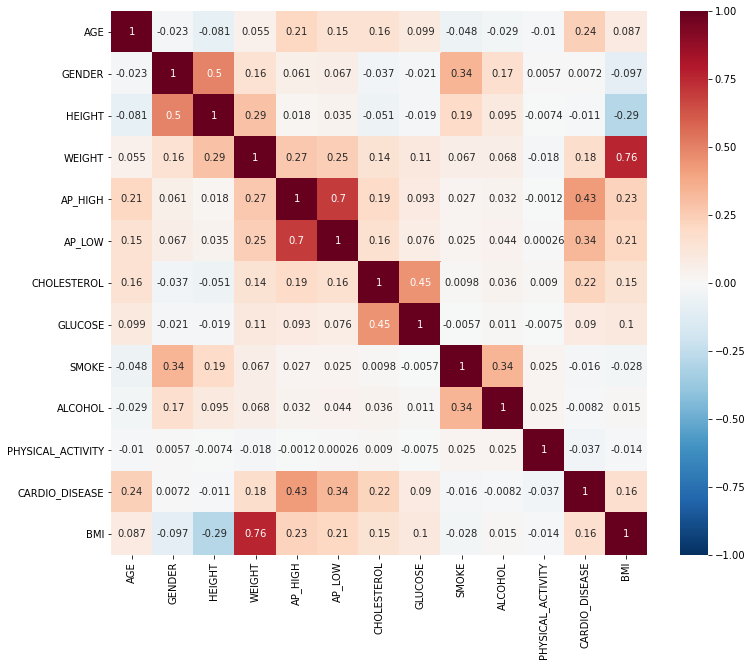

In [39]:
# plotting correlation map

correlation = dataset.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# After feature selection

In [40]:
#new_v_dataset = dataset.drop(['GENDER','SMOKE','ALCOHOL'], axis=1, inplace=False)

In [41]:
new_dataset_version.head()

,GENDER,age_tees,BMI,BMI_State,CHOLESTEROL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,blood_pressure
0,2,2,21.967120,1,1,1,0,1
1,1,3,34.927679,0,3,1,1,2
2,1,3,23.507805,1,3,0,1,1
3,2,2,28.710479,0,1,1,1,2
4,1,2,23.011177,1,1,0,0,4


In [42]:
# split into input (X) and output (y) variables
X_v = new_dataset_version.drop(['CARDIO_DISEASE'], axis=1, inplace=False)
y_v = new_dataset_version['CARDIO_DISEASE']

In [43]:
# Split the data into training and testing sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_v, y_v,                                
                                                    test_size = 0.25,shuffle=True)#random_state = 2
scaler = StandardScaler()
X_train_v = scaler.fit_transform(X_train_v)
X_test_v = scaler.fit_transform(X_test_v)
# Show the results of the split
print("Training set has {} samples.".format(X_train_v.shape[0]))
print("Testing set has {} samples.".format(X_test_v.shape[0]))

Training set has 51587 samples.
Testing set has 17196 samples.


In [44]:
#70
# define the keras model
# You can change  num of hidden layers such as : model.add(Dense(256, activation='relu'))
# You can change  num of hidden nuerons Dense(32 or Dense(64 or Dense(128 

'''model = Sequential()
model.add(Dense(18, input_dim=7, activation='elu'))
model.add(Dense(64))
model.add(Dense(200, activation='elu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='swish'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model .summary()'''

"model = Sequential()\nmodel.add(Dense(18, input_dim=7, activation='elu'))\nmodel.add(Dense(64))\nmodel.add(Dense(200, activation='elu'))\nmodel.add(Dense(8, activation='relu'))\nmodel.add(Dense(4, activation='swish'))\nmodel.add(Dense(2, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel .summary()"

In [45]:
#70

from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_v.shape[1]]),
    layers.Dropout(0.2, seed=2),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4

In [46]:
from tensorflow.keras import layers
'''
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_v.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model.summary()'''

'''
model = keras.Sequential([
layers.Dense(10, input_shape=[X_train_v.shape[1]], activation='tanh'),
layers.Dropout(0.2),
layers.Dense(5, activation='relu'),
layers.Dropout(0.2),
layers.Dense(3, activation='relu'),
layers.Dropout(0.2), 
layers.Dense(1, activation='sigmoid')])
#69.88%'''

#0.6447
#67
#70
'''
init_w = keras.initializers.glorot_uniform(seed=0)
loss = "binary_crossentropy"
optimizer = keras.optimizers.Adam()

model = Sequential()
model.add(keras.layers.Dense(50, kernel_initializer=init_w, input_shape=(X_train_v.shape[1],)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dropout(rate=0.001))
model.add(keras.layers.Dense(25, kernel_initializer=init_w))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dropout(rate=0.001))
model.add(keras.layers.Dense(12, kernel_initializer=init_w))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(1, kernel_initializer=init_w))
model.add(keras.layers.Activation("sigmoid"))
model.summary()'''

'\ninit_w = keras.initializers.glorot_uniform(seed=0)\nloss = "binary_crossentropy"\noptimizer = keras.optimizers.Adam()\n\nmodel = Sequential()\nmodel.add(keras.layers.Dense(50, kernel_initializer=init_w, input_shape=(X_train_v.shape[1],)))\nmodel.add(keras.layers.BatchNormalization())\nmodel.add(keras.layers.LeakyReLU())\nmodel.add(keras.layers.Dropout(rate=0.001))\nmodel.add(keras.layers.Dense(25, kernel_initializer=init_w))\nmodel.add(keras.layers.BatchNormalization())\nmodel.add(keras.layers.LeakyReLU())\nmodel.add(keras.layers.Dropout(rate=0.001))\nmodel.add(keras.layers.Dense(12, kernel_initializer=init_w))\nmodel.add(keras.layers.LeakyReLU())\nmodel.add(keras.layers.Dense(1, kernel_initializer=init_w))\nmodel.add(keras.layers.Activation("sigmoid"))\nmodel.summary()'

In [47]:
opt=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")

#opt=keras.optimizers.Adadelta(learning_rate=0.2, rho=0.95, epsilon=1e-07, name="Adadelta")
#opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [48]:
# Fit the model
history = model.fit(X_train_v, y_train_v,validation_split=0.15, epochs=150, batch_size=540)

# evaluate the model
scores = model.evaluate(X_train_v, y_train_v)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
82/82 [==============================] - 2s 14ms/step - loss: 0.6566 - accuracy: 0.6170 - val_loss: 0.5879 - val_accuracy: 0.7044
Epoch 2/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5935 - accuracy: 0.6917 - val_loss: 0.5785 - val_accuracy: 0.7094
Epoch 3/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5911 - accuracy: 0.6931 - val_loss: 0.5745 - val_accuracy: 0.7087
Epoch 4/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5863 - accuracy: 0.6946 - val_loss: 0.5744 - val_accuracy: 0.7066
Epoch 5/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5842 - accuracy: 0.6973 - val_loss: 0.5740 - val_accuracy: 0.7066
Epoch 6/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5859 - accuracy: 0.6968 - val_loss: 0.5737 - val_accuracy: 0.7080
Epoch 7/150
82/82 [==============================] - 1s 7ms/step - loss: 0.5848 - accuracy: 0.7001 - val_loss: 0.5731 - val_accuracy: 0.7091
Epoch 8/150


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


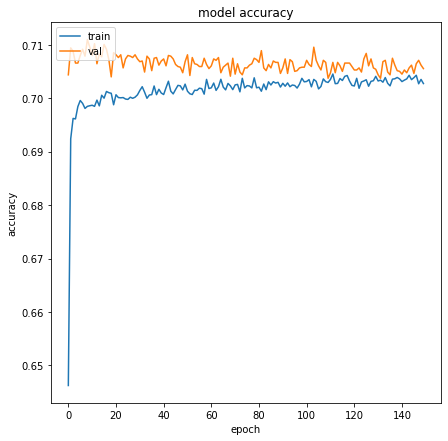

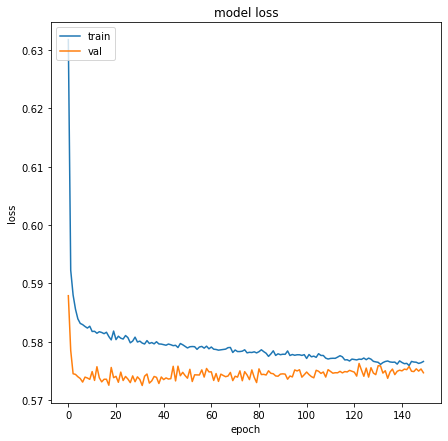

In [49]:
# Comparing Validation and training results
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
# evaluate the model
test_score = model.evaluate(X_test_v, y_test_v)
print("Testing Acc:", test_score[1])

538/538 [==============================] - 1s 1ms/step - loss: 0.5774 - accuracy: 0.7058
Testing Acc: 0.7058036923408508


In [51]:
y_pred = model.predict(X_test_v)
cm = confusion_matrix(y_test_v, y_pred.round())
print("Confusion Matrix:", "\n", cm)

Confusion Matrix: 
 [[6774 1924]
 [3135 5363]]


Text(0.5, 1.0, 'ANN Dropout')

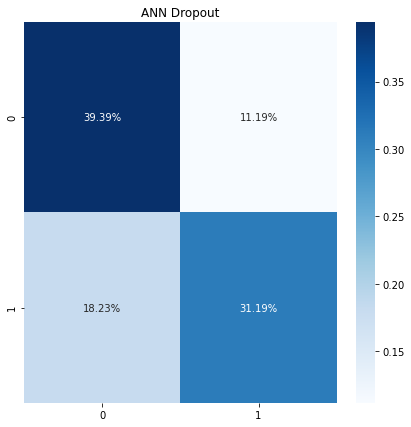

In [52]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('ANN Dropout')


In [53]:
tpr, fpr, threshold = roc_curve(y_test_v, y_pred)
auc_score = roc_auc_score(y_test_v, y_pred)
print("AUC-score:", auc_score)

AUC-score: 0.7650276320545254


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test_v, y_pred.round()))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      8698
           1       0.74      0.63      0.68      8498

    accuracy                           0.71     17196
   macro avg       0.71      0.70      0.70     17196
weighted avg       0.71      0.71      0.70     17196



In [55]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

# LogisticRegression¶

In [56]:
logmodel = LogisticRegression()
train = logmodel.fit(X_train_v,y_train_v)

#training

print("Train Accuracy:",logmodel.score(X_train_v,y_train_v))


Train Accuracy: 0.6372923410936864


In [57]:
#testing
predictions=logmodel.predict(X_test_v)
print('accuracy_score',accuracy_score(y_test_v,predictions))
print('precision_score',precision_score(y_test_v,predictions))
print('recall_score',recall_score(y_test_v,predictions))
print('f1_score',f1_score(y_test_v,predictions))

print(classification_report(y_test_v, predictions))

cmlr = confusion_matrix(y_test_v, predictions.round())
print("Confusion Matrix:", "\n", cmlr)

accuracy_score 0.6381716678297279
precision_score 0.642678034102307
recall_score 0.6032007531183808
f1_score 0.622313949253369
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      8698
           1       0.64      0.60      0.62      8498

    accuracy                           0.64     17196
   macro avg       0.64      0.64      0.64     17196
weighted avg       0.64      0.64      0.64     17196

Confusion Matrix: 
 [[5848 2850]
 [3372 5126]]


Text(0.5, 1.0, 'LR')

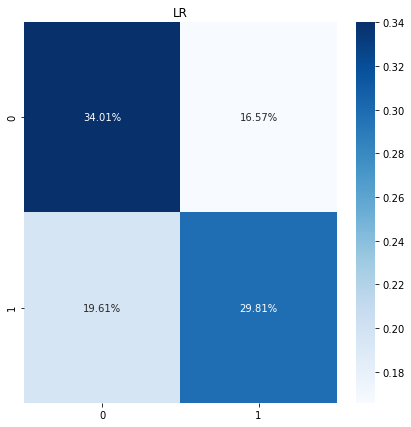

In [58]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cmlr/np.sum(cmlr), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('LR')

# SVM

In [59]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)
classifierSVM.fit(X_train_v,y_train_v)

#training
print("Train Accuracy:",classifierSVM.score(X_train_v,y_train_v))

Train Accuracy: 0.7014557931261752


In [60]:
predictionsSVM=classifierSVM.predict(X_test_v)


print('accuracy_score',accuracy_score(y_test_v,predictionsSVM))
print('precision_score',precision_score(y_test_v,predictionsSVM))
print('recall_score',recall_score(y_test_v,predictionsSVM))
print('f1_score',f1_score(y_test_v,predictionsSVM))

cmsvm = confusion_matrix(y_test_v,predictionsSVM.round())
print("Confusion Matrix:", "\n", cmsvm)


accuracy_score 0.7028378692719237
precision_score 0.7455784285300087
recall_score 0.6052012238173687
f1_score 0.6680956092491556
Confusion Matrix: 
 [[6943 1755]
 [3355 5143]]


In [61]:
print(classification_report(y_test_v, predictionsSVM))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      8698
           1       0.75      0.61      0.67      8498

    accuracy                           0.70     17196
   macro avg       0.71      0.70      0.70     17196
weighted avg       0.71      0.70      0.70     17196



Text(0.5, 1.0, 'SVM')

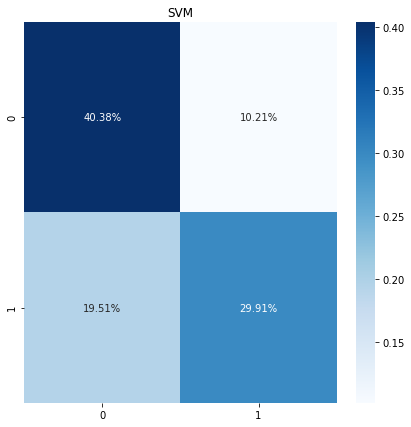

In [62]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cmsvm/np.sum(cmsvm), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('SVM')

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_jobs=-1)
modelKNN.fit(X_train_v,y_train_v)

#training
print("Train Accuracy:",modelKNN.score(X_train_v,y_train_v))

Train Accuracy: 0.7484637602496753


In [64]:
predictionKNN=modelKNN.predict(X_test_v)

print('accuracy_score',accuracy_score(y_test_v,predictionKNN))
print('precision_score',precision_score(y_test_v,predictionKNN))
print('recall_score',recall_score(y_test_v,predictionKNN))
print('f1_score',f1_score(y_test_v,predictionKNN))


print(classification_report(y_test_v, predictionKNN))

cmknn = confusion_matrix(y_test_v, predictionKNN.round())
print("Confusion Matrix:", "\n", cmknn)

accuracy_score 0.6606187485461735
precision_score 0.6597455592894863
recall_score 0.6468580842551188
f1_score 0.6532382650029709
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      8698
           1       0.66      0.65      0.65      8498

    accuracy                           0.66     17196
   macro avg       0.66      0.66      0.66     17196
weighted avg       0.66      0.66      0.66     17196

Confusion Matrix: 
 [[5863 2835]
 [3001 5497]]


Text(0.5, 1.0, 'KNN')

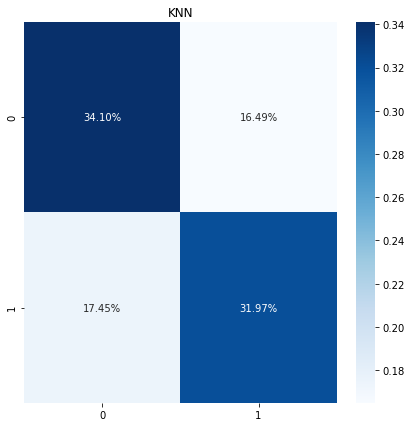

In [65]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cmknn/np.sum(cmknn), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('KNN')

# Naïve Bayes (NB)

In [66]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train_v,y_train_v)


#training
print("Train Accuracy:",gnb.score(X_train_v,y_train_v))

Train Accuracy: 0.6459379300986683


In [67]:
predictionNB=gnb.predict(X_test_v)

print('accuracy_score',accuracy_score(y_test_v,predictionNB))
print('precision_score',precision_score(y_test_v,predictionNB))
print('recall_score',recall_score(y_test_v,predictionNB))
print('f1_score',f1_score(y_test_v,predictionNB))


print(classification_report(y_test_v, predictionNB))

cmnb = confusion_matrix(y_test_v, predictionNB.round())
print("Confusion Matrix:", "\n", cmnb)

accuracy_score 0.6460804838334496
precision_score 0.6521574564723694
recall_score 0.6082607672393504
f1_score 0.6294447150511446
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      8698
           1       0.65      0.61      0.63      8498

    accuracy                           0.65     17196
   macro avg       0.65      0.65      0.65     17196
weighted avg       0.65      0.65      0.65     17196

Confusion Matrix: 
 [[5941 2757]
 [3329 5169]]


Text(0.5, 1.0, 'NB')

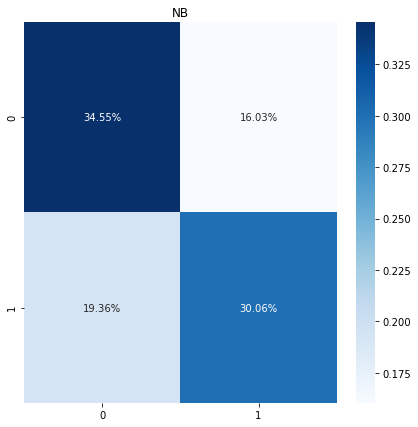

In [68]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cmnb/np.sum(cmnb), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('NB')

# DT

In [69]:
from sklearn import tree

#create an object of the model
clfDT = tree.DecisionTreeClassifier()
clfDT = clfDT.fit(X_train_v,y_train_v)


#training
print("Train Accuracy:",clfDT.score(X_train_v,y_train_v))

Train Accuracy: 0.8597708725066393


In [70]:
#Prediction
predictionDT = clfDT.predict(X_test_v)

print('accuracy_score',accuracy_score(y_test_v,predictionDT))
print('precision_score',precision_score(y_test_v,predictionDT))
print('recall_score',recall_score(y_test_v,predictionDT))
print('f1_score',f1_score(y_test_v,predictionDT))

print(classification_report(y_test_v, predictionDT))

cmdt = confusion_matrix(y_test_v, predictionDT.round())
print("Confusion Matrix:", "\n", cmdt)

accuracy_score 0.6168876482903001
precision_score 0.6291238507301244
recall_score 0.5475405977877148
f1_score 0.5855039637599094
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      8698
           1       0.63      0.55      0.59      8498

    accuracy                           0.62     17196
   macro avg       0.62      0.62      0.61     17196
weighted avg       0.62      0.62      0.62     17196

Confusion Matrix: 
 [[5955 2743]
 [3845 4653]]


Text(0.5, 1.0, 'DT')

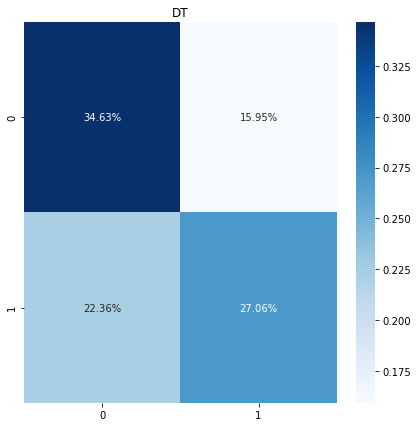

In [71]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cmdt/np.sum(cmdt), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('DT')